In [155]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [156]:
df = pd.read_csv('protests.csv')
df.head()

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles
0,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1
1,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4
2,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1
3,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1
4,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1


In [158]:
# 1° análise:
# Análise temporal dos protestos
# 1.1 - Quantidade de protestos por ano

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df.head()



,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles,year,month,day
0,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1,2017,1,15
1,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4,2017,1,16
2,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1,2017,1,16
3,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1,2017,1,16
4,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1,2017,1,18


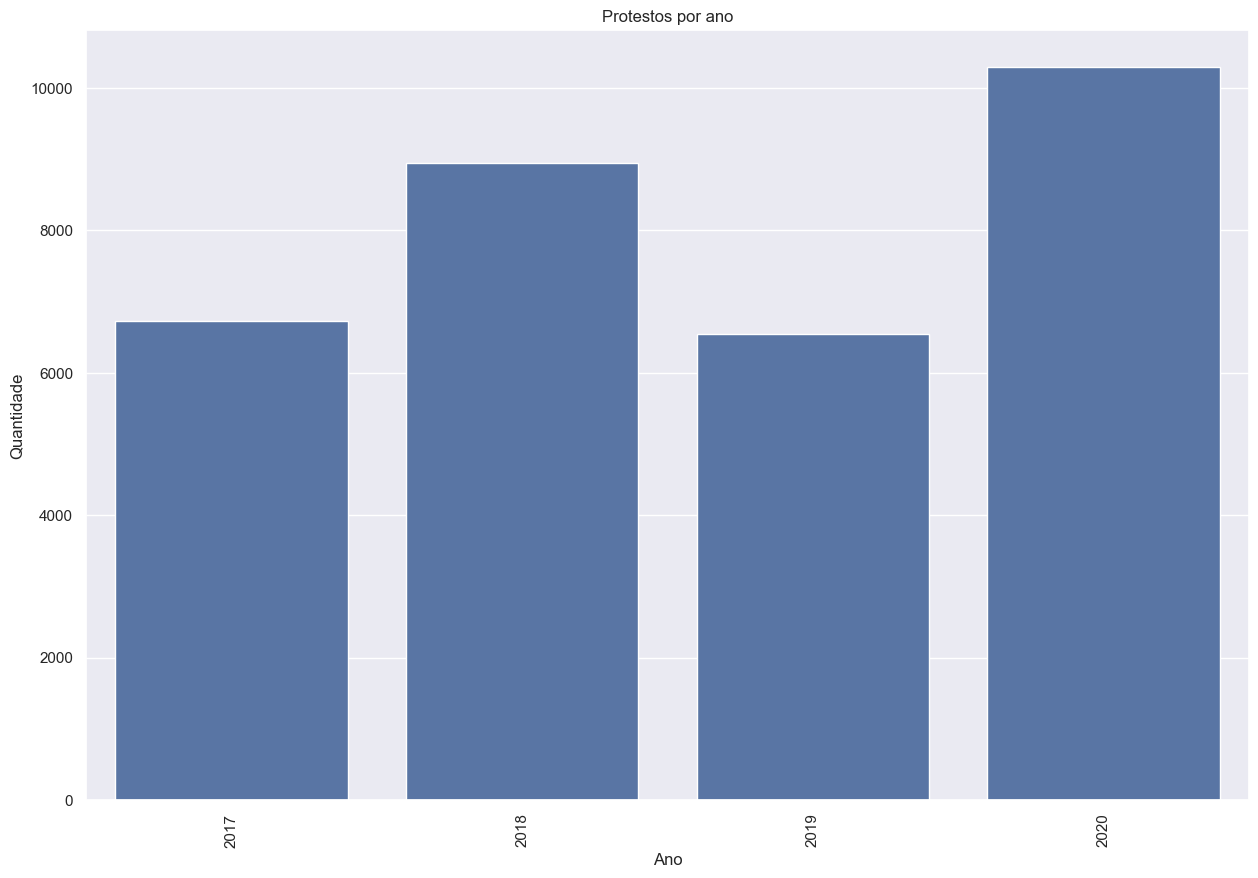

In [159]:
# Grafico de protestos ao longo dos anos 
sns.set()

plt.figure(figsize=(15, 10))
sns.countplot(x='year', data=df)
plt.title('Protestos por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

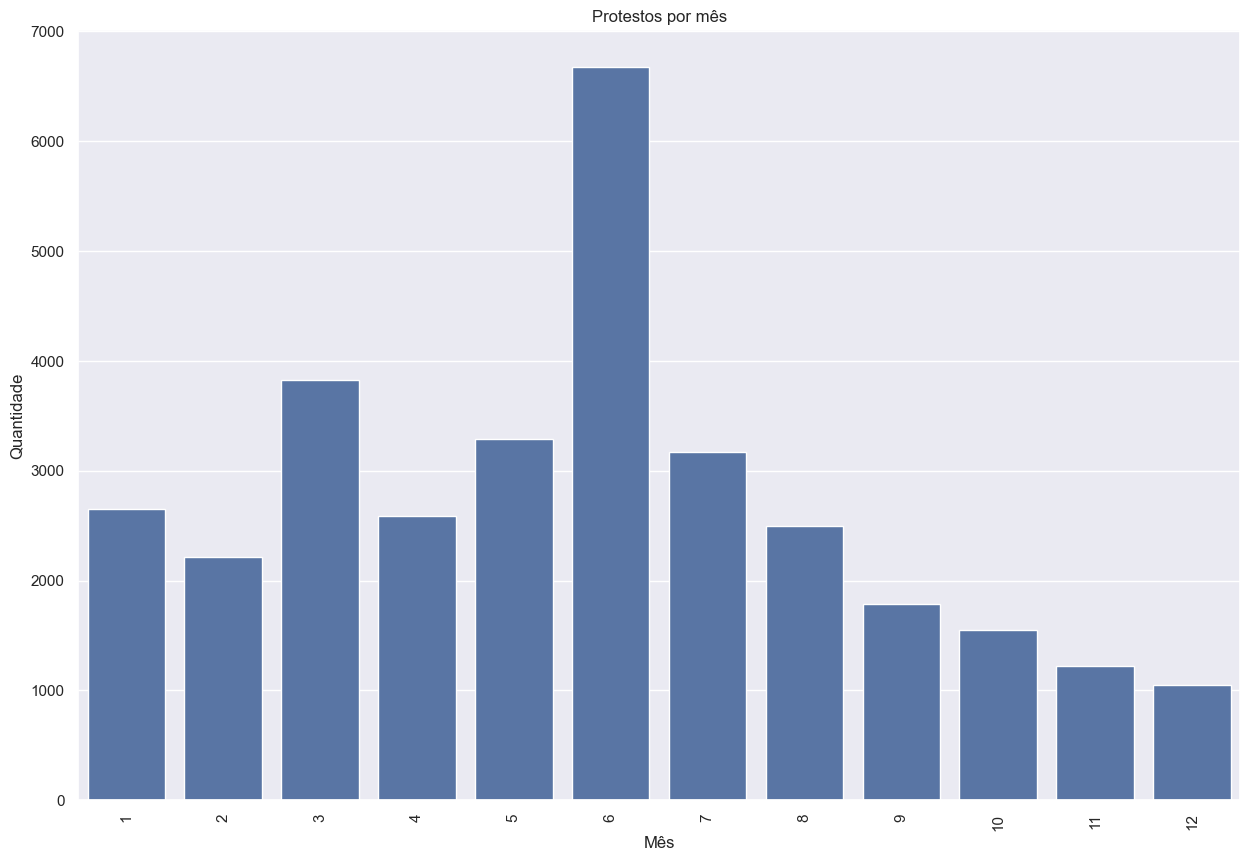

In [160]:
# 1.2 - Quantidade de protestos por mês
plt.figure(figsize=(15, 10))
sns.countplot(x='month', data=df)
plt.title('Protestos por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()


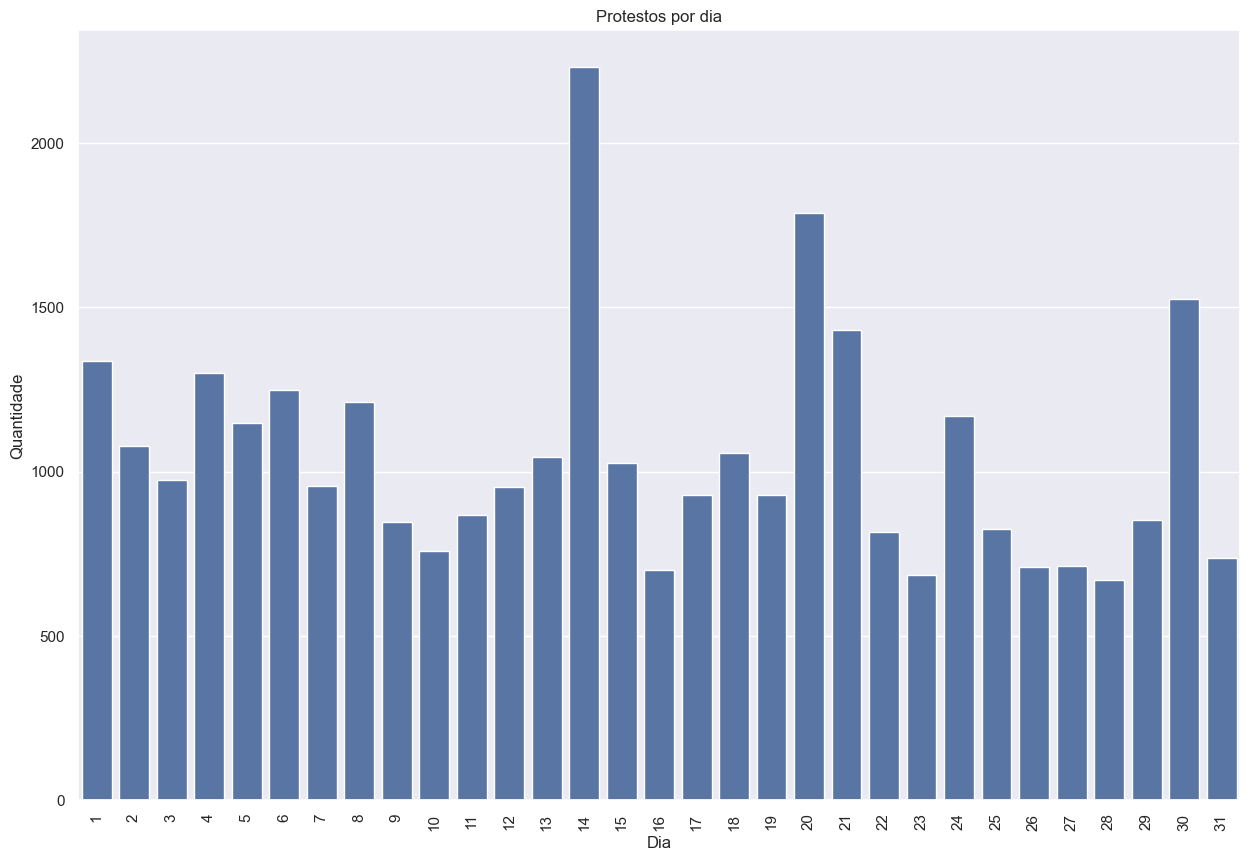

In [161]:
# 1.3 - Quantidade de protestos por dia
plt.figure(figsize=(15, 10))
sns.countplot(x='day', data=df)
plt.title('Protestos por dia')
plt.xlabel('Dia')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

In [162]:

#Análise de Padrões Temporais nos Protestos:

#Ao examinar a distribuição dos protestos ao longo dos meses, 
# observamos uma tendência que sugere uma sazonalidade marcante.
# Parece haver um aumento consistente no número de protestos durante os meses de verão,
# enquanto o final do ano, particularmente dezembro, apresenta uma diminuição notável nas atividades de protesto.

# Interpretação dos Padrões Sazonais:

# Esta sazonalidade pode ser atribuída a diversos fatores. A hipótese sugere que, durante os meses de verão, 
# as condições climáticas mais favoráveis podem encorajar as pessoas a se envolverem em atividades de protesto.
# O clima ameno pode criar um ambiente propício para a participação em eventos ao ar livre, influenciando positivamente a mobilização popular.

# Por outro lado, a redução de protestos em dezembro pode ser resultado de vários fatores.
# Além de ser o mês mais frio do ano em muitas regiões, as preocupações das pessoas durante as festividades de fim de ano 
# e o período de férias podem desviar a atenção dos assuntos políticos e sociais.

In [163]:
# 2° análise:
# Análise geográfica dos protestos
# 2.1 - Quantidade de protestos por região
# Antes vamos criar uma coluna com a região de cada estado

# list(df['Location'].unique())
# vamos criar uma coluna de cidade e estado para facilitar a análise
df['city'] = df['Location'].apply(lambda x: x.split(',')[0])
df['state'] = df['Location'].apply(lambda x: x.split(',')[2] if len(x.split(',')) > 2 else x.split(',')[-1])


In [164]:
# states que possuem só um protesto
# colocar os states que possuem só um protesto em uma lista
states = df['state'].value_counts()
states = states[states == 1]
states = list(states.index)
states
# dropar os estados que possuem só um protesto
df = df[~df['state'].isin(states)]

df['city'].unique()

array(['Bowie State University', 'Johnson City', 'Indianapolis', ...,
       'Ann Morrison Park', 'Park Middle School', 'Summit Middle School'],
      dtype=object)

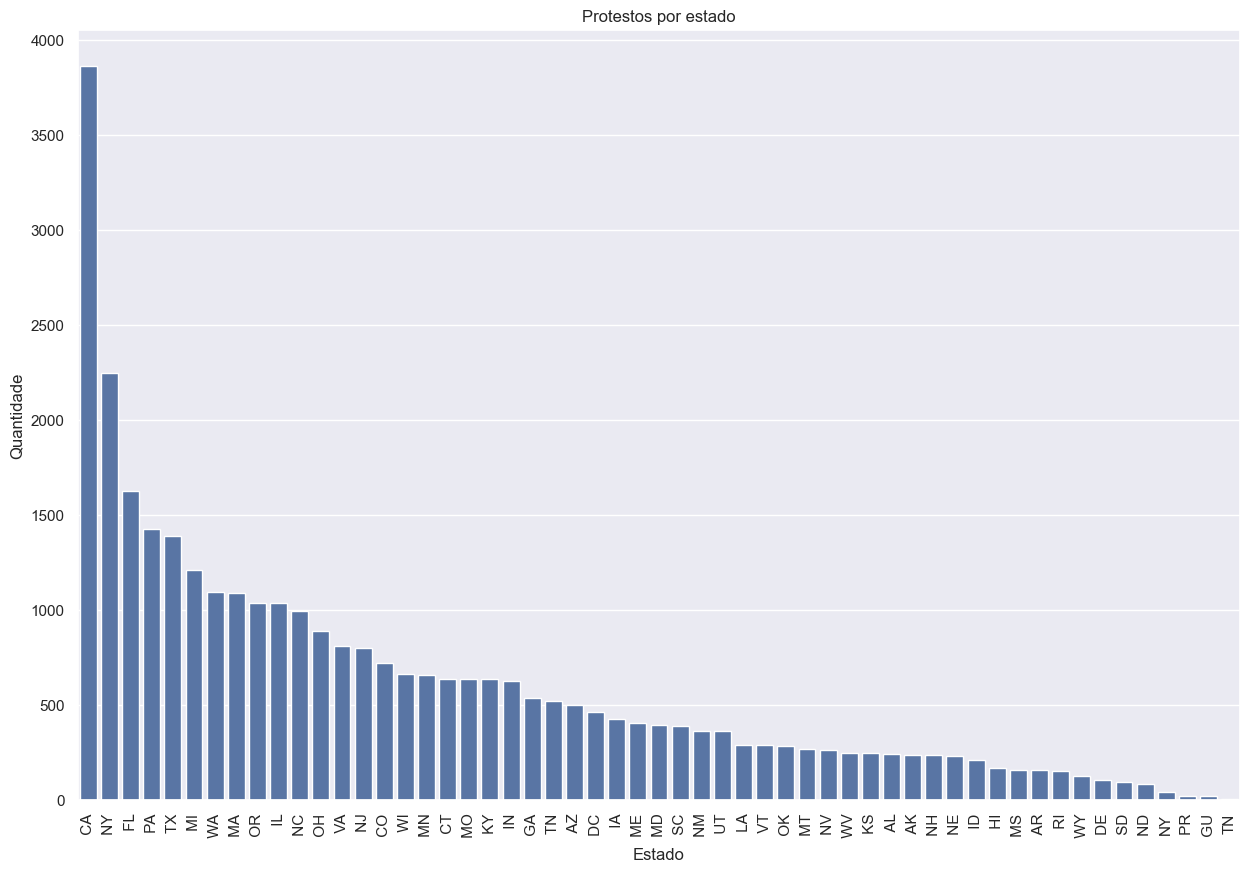

In [165]:
# Agrupar o numero de protestos por estado
df_states = df.groupby('state').count()
df_states = df_states.reset_index()
df_states = df_states[['state', 'Date']]
df_states.columns = ['state', 'count']
# Substituir o nome dos estados
df_states['state'] = df_states['state'].replace({' New York': 'NY', ' Knoxville': 'TN'})

# dropar os estados Knoxvile e New York
df_states = df_states[~df_states['state'].isin(['Knoxville', 'New York'])]

# grafico de barras com a quantidade de protestos por estado
plt.figure(figsize=(15, 10))
sns.barplot(x='state', y='count', data=df_states.sort_values(by='count', ascending=False))
plt.title('Protestos por estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()


In [166]:
# O estado que mais teve protestos foi a California, seguido de Nova York e Texas. Isso pode ser explicado pelo fato de que esses
# estados são os mais populosos dos EUA, por isso, é esperado que eles tenham mais protestos.
# O estado que menos teve protestos foi o Alaska, seguido de Wyoming e Dakota do Norte. Isso pode ser explicado pelo fato de que esses
# estados são os menos populosos dos EUA, por isso, é esperado que eles tenham menos protestos.

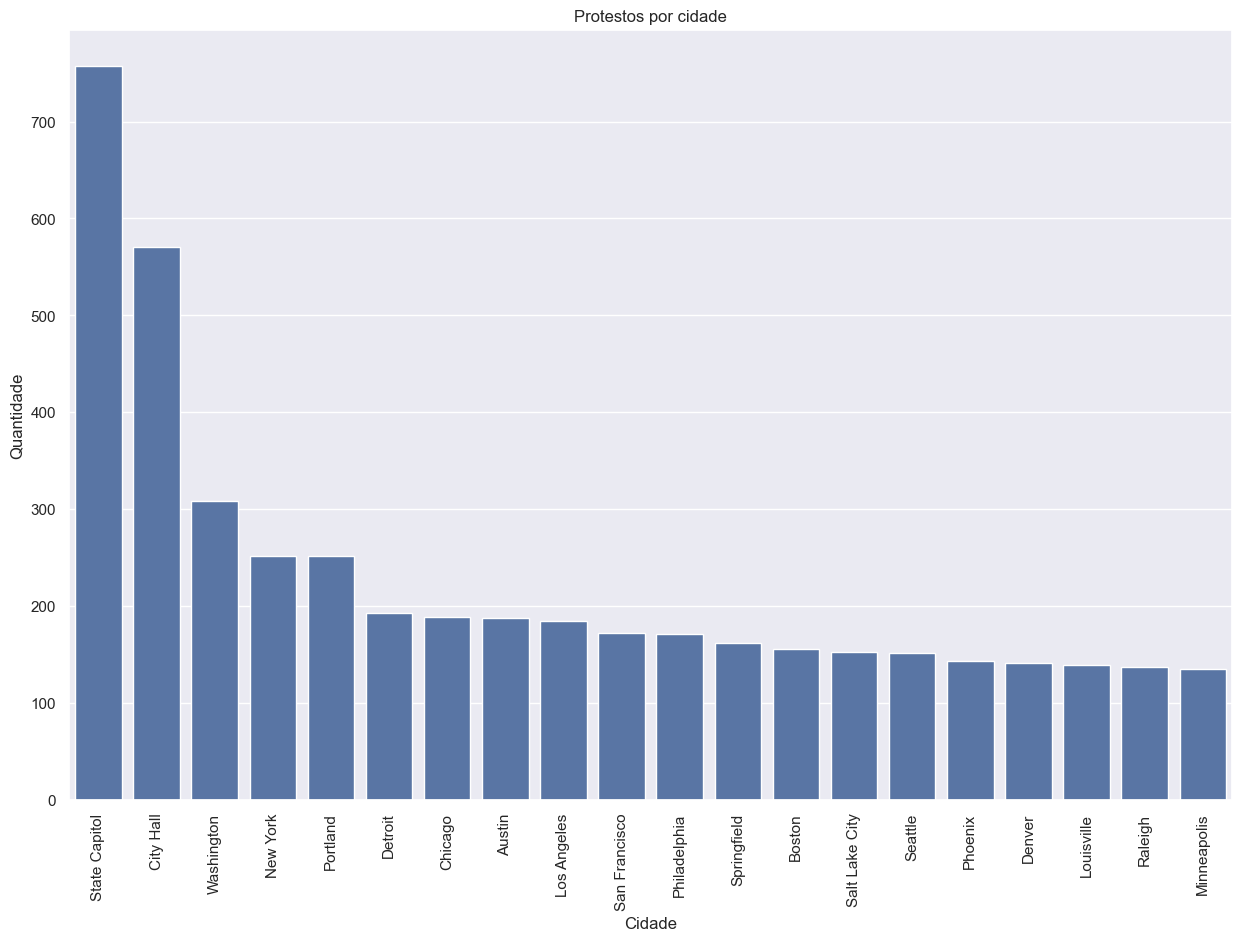

In [167]:
# Analise de protestos por cidade
df_city = df.groupby('city').count()
df_city = df_city.reset_index()
df_city = df_city[['city', 'Date']]
df_city.columns = ['city', 'count']
df_city = df_city.sort_values(by='count', ascending=False)
df_city.head()

# Renomear as cidades
df_city['city'] = df_city['city'].replace({' State Capitol': 'Washington', ' City Hall': 'Philadelphia'})

# grafico de barras com a quantidade de protestos por cidade
plt.figure(figsize=(15, 10))
sns.barplot(x='city', y='count', data=df_city.head(20))
plt.title('Protestos por cidade')
plt.xlabel('Cidade')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()


In [168]:
# Local onde teve mais protesto foi em Washington, seguido de Philadelphia.
# Em Washington, o local onde se tem bastante protesto é no State Capitol(que é o local onde fica o governo).
# Em Philadelphia, o local onde teve mais protesto devido a City Hall.

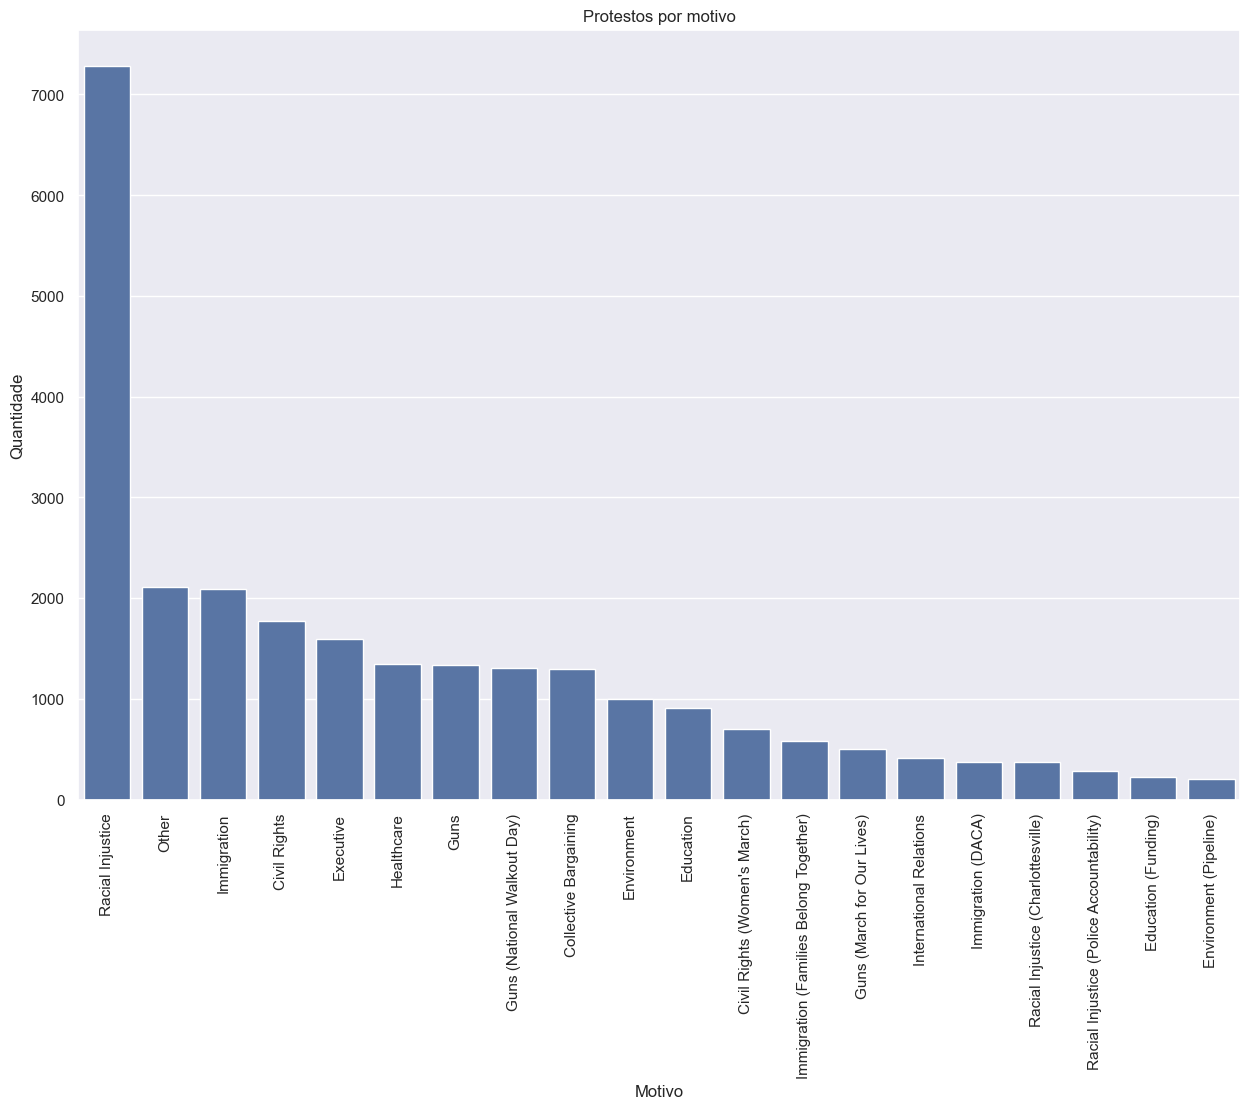

In [178]:
# 3° análise:
# Analise de protestos por motivo
df_cause = df.groupby('Event (legacy; see tags)').count()
df_cause = df_cause.reset_index()
df_cause = df_cause[['Event (legacy; see tags)', 'Date']]
df_cause.columns = ['cause', 'count']
df_cause = df_cause.sort_values(by='count', ascending=False)
df_cause.head()

# grafico de barras com a quantidade de protestos por motivo
plt.figure(figsize=(15, 10))
sns.barplot(x='cause', y='count', data=df_cause.head(20))
plt.title('Protestos por motivo')
plt.xlabel('Motivo')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)
plt.show()




In [ ]:
# Tem - se que o motivo que mais teve protesto foi Racial Justice. Isso pode ser explicado pelo fato de que os EUA é um país
# onde se existe casos que envolvem racismo e por isso, as pessoas protestam contra isso. Um exemplo disso é o caso de George Floyd
# que foi morto por um policial branco e isso gerou uma onda de protestos por todo o país.